Importing the required libraries

In [21]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
import numpy as np
import seaborn as sns

In [7]:
#Creating a dataframe df using pandas
df = pd.read_csv("Toy_Dataset.xlsx - Toy_Dataset.csv")

In [8]:
#Getting to know the dimensions of the dataset as well as the number of features
df.shape

(100865, 18)

In [12]:
#Overview of the dataset and conclude the nature of the features as ordinal,nominal,continuous,etc
df.head()

,index,user_id,gender,age,start_bmi,activity_factor,OS,connected_pedometer,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,devicebrand,paid
0,109000,2224406.0,male,44.0,32.7,1.725,ios,NaN,0,0,0,0,0,0,0,0,apple,0
1,109001,2224394.0,female,63.0,33.7,1.200,android,NaN,0,0,0,0,0,0,0,0,motorola,0
2,109002,2224399.0,male,141.0,31.4,1.550,android,NaN,0,0,0,0,1,0,0,1,samsung,0
3,109003,2224448.0,male,107.0,34.9,1.200,android,google_fit,0,0,0,0,0,0,0,0,vivo,0
4,109004,2224393.0,female,98.0,37.8,1.375,android,NaN,1,0,0,0,0,0,0,1,samsung,0


In [13]:
#Understanding the measure of central tendency and summarizing the data
df.describe()

,index,user_id,age,start_bmi,activity_factor,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,paid
count,100865.000000,9.186500e+04,91863.000000,90394.000000,100858.000000,100865.000000,100865.000000,100865.000000,100865.000000,100865.000000,100865.000000,100865.000000,100865.000000,100865.000000
mean,159432.000000,2.320608e+06,83.169263,33.524202,1.374217,0.102295,0.057532,0.058167,0.034422,0.084816,0.000902,0.083260,0.345987,0.010321
std,29117.361788,5.948612e+04,30.235619,4.969434,0.172002,0.303038,0.232858,0.234060,0.182312,0.278610,0.030023,0.276276,0.475691,0.101066
min,109000.000000,2.224380e+06,14.000000,7.400000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134216.000000,2.270432e+06,58.000000,30.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159432.000000,2.315781e+06,83.000000,33.100000,1.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,184648.000000,2.368546e+06,108.000000,36.300000,1.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,209864.000000,2.437677e+06,186.000000,99.800000,1.725000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Checking for total null values
df.isnull().sum()

index                      0
user_id                 9000
gender                     2
age                     9002
start_bmi              10471
activity_factor            7
OS                         0
connected_pedometer    79513
hypothyroid                0
diabetes                   0
pcos                       0
physical                   0
hypertension               0
high_blood_pressure        0
cholesterol                0
medical_conditions         0
devicebrand                0
paid                       0
dtype: int64

In [15]:
# class distribution. As you can see , it is a highly imbalanced dataset
print(df.groupby('paid').size())

paid
0    99824
1     1041
dtype: int64


In [16]:
#Creating a DataFrame Groupby object by the target variable "paid" and the gender of the user
df.groupby(['paid','gender'])['paid'].count()

paid  gender
0     female    47419
      male      52403
1     female      493
      male        548
Name: paid, dtype: int64

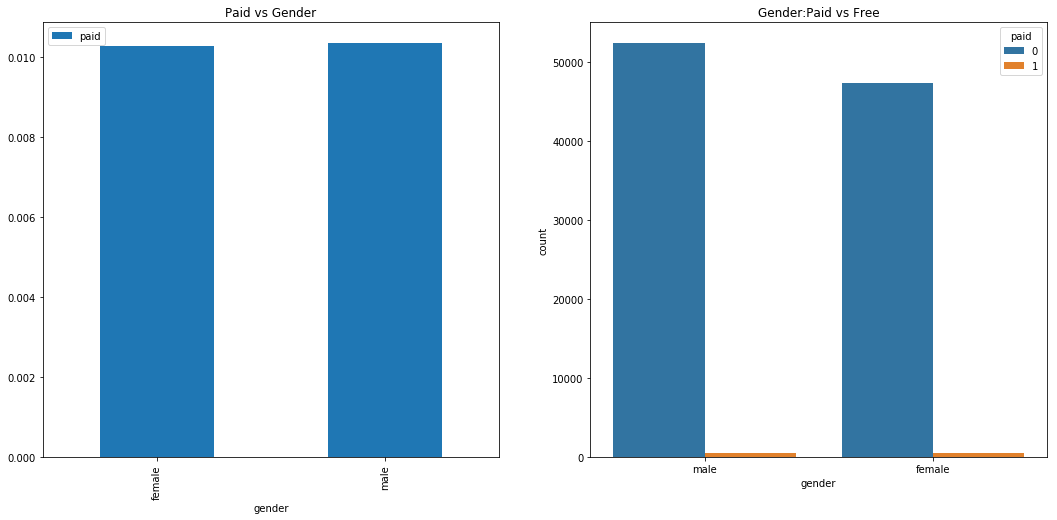

In [23]:
f,ax=pyplot.subplots(1,2,figsize=(18,8))
df[['gender','paid']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Paid vs Gender')
sns.countplot('gender',hue='paid',data=df,ax=ax[1])
ax[1].set_title('Gender:Paid vs Free')
pyplot.show()

In [24]:
##Creating a DataFrame Groupby object by the target variable "paid" and Operating System of the user's phone
df.groupby(['paid','OS'])['paid'].count()

paid  OS     
0     android    85599
      both         306
      ios        13919
1     android      901
      both           5
      ios          135
Name: paid, dtype: int64

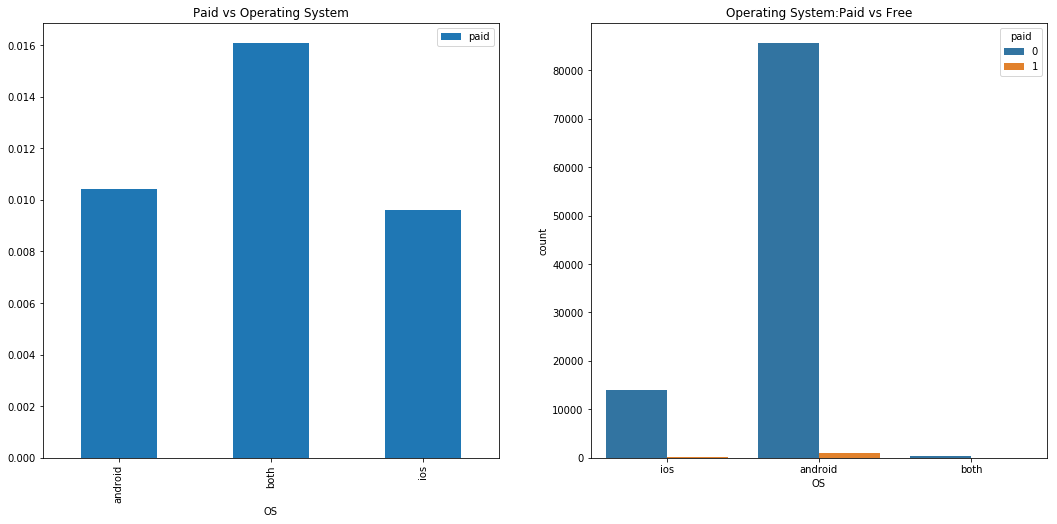

In [25]:
f,ax=pyplot.subplots(1,2,figsize=(18,8))
df[['OS','paid']].groupby(['OS']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Paid vs Operating System')
sns.countplot('OS',hue='paid',data=df,ax=ax[1])
ax[1].set_title('Operating System:Paid vs Free')
pyplot.show()

In [28]:
#df.groupby(['paid','devicebrand'])['paid'].count()

In [30]:
#Getting some insight on relation of gender and OS with the target varibale "paid". Asking the question that does both columns effect the outcome of target variable?
pd.crosstab([df.gender,df.paid],df.OS,margins=True).style.background_gradient(cmap='summer_r')

In [35]:
# now let us check in the number of Percentage
Count_Free_transacation = len(df[df["paid"]==0]) # normal transaction are repersented by 0
Count_Paid_transacation = len(df[df["paid"]==1]) # fraud by 1
Percentage_of_Free_transacation = Count_Free_transacation/(Count_Free_transacation+Count_Paid_transacation)
print("percentage of Free transacation is",Percentage_of_Free_transacation*100)
Percentage_of_Paid_transacation= Count_Paid_transacation/(Count_Free_transacation+Count_Paid_transacation)
print("percentage of Paid transacation",Percentage_of_Paid_transacation*100)


percentage of Free transacation is 98.96792742774996
percentage of Paid transacation 1.0320725722500372


Imbalanced classes put “accuracy” out of business. This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.
Standard accuracy no longer reliably measures performance, which makes model training much trickier.

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [38]:
#First, we'll separate observations from each class into different DataFrames.
df_majority = df[df.paid==0]
df_minority = df[df.paid==1]
from sklearn.utils import resample

In [39]:
#Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=99824,    # to match majority class
                                 random_state=123) # reproducible results

In [41]:
#Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.paid.value_counts()

1    99824
0    99824
Name: paid, dtype: int64

In [42]:
#There are more male users than females but it is evident that the gender won't affect conversion as of a stand alone feature
df_upsampled.groupby(['paid','gender'])['paid'].count()

paid  gender
0     female    47419
      male      52403
1     female    47197
      male      52627
Name: paid, dtype: int64

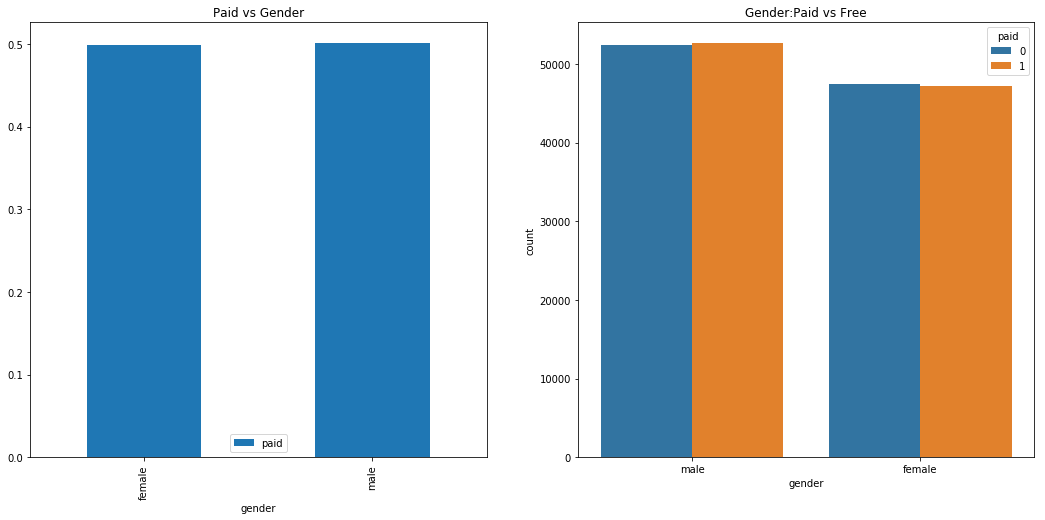

In [43]:
f,ax=pyplot.subplots(1,2,figsize=(18,8))
df_upsampled[['gender','paid']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Paid vs Gender')
sns.countplot('gender',hue='paid',data=df_upsampled,ax=ax[1])
ax[1].set_title('Gender:Paid vs Free')
pyplot.show()

In [44]:
df_upsampled.groupby(['paid','OS'])['paid'].count()

paid  OS     
0     android    85599
      both         306
      ios        13919
1     android    86405
      both         512
      ios        12907
Name: paid, dtype: int64

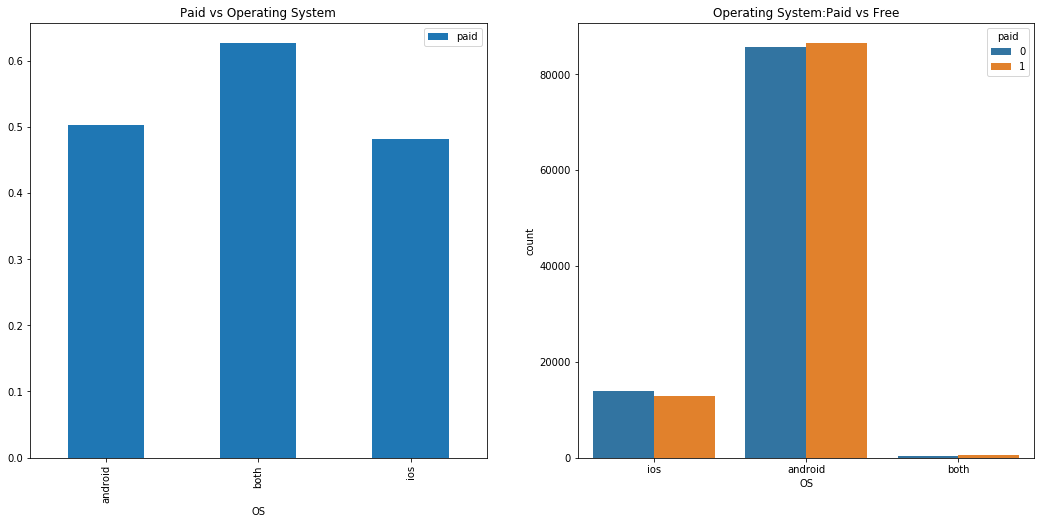

In [45]:
f,ax=pyplot.subplots(1,2,figsize=(18,8))
df_upsampled[['OS','paid']].groupby(['OS']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Paid vs Operating System')
sns.countplot('OS',hue='paid',data=df_upsampled,ax=ax[1])
ax[1].set_title('Operating System:Paid vs Free')
pyplot.show()

In [46]:
missing_values_count = df_upsampled.isnull().sum()

In [48]:
pd.crosstab(df_upsampled.OS,df_upsampled.paid,margins=True).style.background_gradient(cmap='summer_r')

paid,0,1,All
OS,,,
android,85599,86405,172004
both,306,512,818
ios,13919,12907,26826
All,99824,99824,199648


In [49]:
pd.crosstab([df_upsampled.gender,df_upsampled.paid],df_upsampled.OS,margins=True).style.background_gradient(cmap='summer_r')

While going through the dataset, I observed that some of the Ages mentioned weren't correct or possible as it was crossing the age of 100 or so, hence I thought it would ideal to replace such values with the mean to get rid of extreme outliers which would affect the performance of the model

In [50]:
print('Oldest User is of:',df_upsampled['age'].max(),'Years')
print('Youngest User is of:',df_upsampled['age'].min(),'Years')
print('Average Age is:',df_upsampled['age'].mean(),'Years')

Oldest User is of: 186.0 Years
Youngest User is of: 14.0 Years
Average Age is: 82.81764468180378 Years


In [66]:
#df_upsampled['age'].replace(df_upsampled.loc[(df_upsampled['age']>100),'age'], df_upsampled['age'].mean(), inplace=True)
df_upsampled.loc[(df_upsampled['age']>100),'age']=df_upsampled['age'].mean()

In [67]:
print('Oldest User is of:',df_upsampled['age'].max(),'Years')
print('Youngest User is of:',df_upsampled['age'].min(),'Years')
print('Average Age is:',df_upsampled['age'].mean(),'Years')

Oldest User is of: 100.0 Years
Youngest User is of: 14.0 Years
Average Age is: 70.58221591114018 Years


In [68]:
df_upsampled['age'].mean()

70.58221591114018

The Curse of Dimensionality

In machine learning, “dimensionality” simply refers to the number of features (i.e. input variables) in your dataset.
When the number of features is very large relative to the number of observations in your dataset, certain algorithms struggle to train effective models. This is called the “Curse of Dimensionality”

In [69]:
#Dropping the column "index" as it is a Nominal Feature and won't add any significant value to the model 
df_upsampled.drop('index', axis=1, inplace=True)

In [70]:
#Dropping the rows in the dataset with more than three missing values
df_upsampled.dropna(thresh=3,inplace=True)

In [74]:
#Filling the Nan values in the feature Connected pedometer by zeroes, as it seemed ideal.
df_upsampled['connected_pedometer'].fillna(0,inplace=True)

In [79]:
df_upsampled.head()

,user_id,gender,age,start_bmi,activity_factor,OS,connected_pedometer,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,devicebrand,paid
0,2224406.0,male,44.0,32.7,1.725,ios,0,0,0,0,0,0,0,0,0,apple,0
1,2224394.0,female,63.0,33.7,1.200,android,0,0,0,0,0,0,0,0,0,motorola,0
2,2224399.0,male,84.0,31.4,1.550,android,0,0,0,0,0,1,0,0,1,samsung,0
3,2224448.0,male,84.0,34.9,1.200,android,google_fit,0,0,0,0,0,0,0,0,vivo,0
4,2224393.0,female,98.0,37.8,1.375,android,0,1,0,0,0,0,0,0,1,samsung,0


The choice of dealing with missing values depends on the context of the situation. Here, I thought rather than removing the missing values, we could replace it with some values depending on the feature,as it could help build a better model and Missing values also can be an important feature in itself

In [159]:
#Successfully dealt with missing values
df_upsampled.isnull().sum()

gender                 0
age                    0
start_bmi              0
activity_factor        0
OS                     0
connected_pedometer    0
hypothyroid            0
diabetes               0
pcos                   0
physical               0
hypertension           0
high_blood_pressure    0
cholesterol            0
medical_conditions     0
Age_band               0
Device                 0
Paid                   0
dtype: int64

In [77]:
df_upsampled.fillna(0,inplace=True)

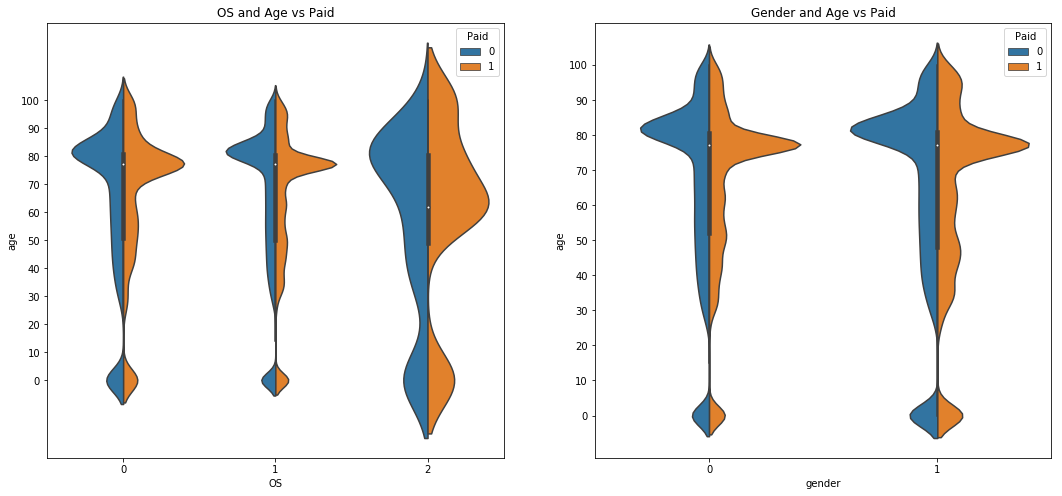

In [162]:
#Observing the range of the Paid variable with respective of the features to get the idea where it is more concentrated
f,ax=pyplot.subplots(1,2,figsize=(18,8))
sns.violinplot("OS","age", hue="Paid", data=df_upsampled,split=True,ax=ax[0])
ax[0].set_title('OS and Age vs Paid')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("gender","age", hue="Paid", data=df_upsampled,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Paid')
ax[1].set_yticks(range(0,110,10))
pyplot.show()

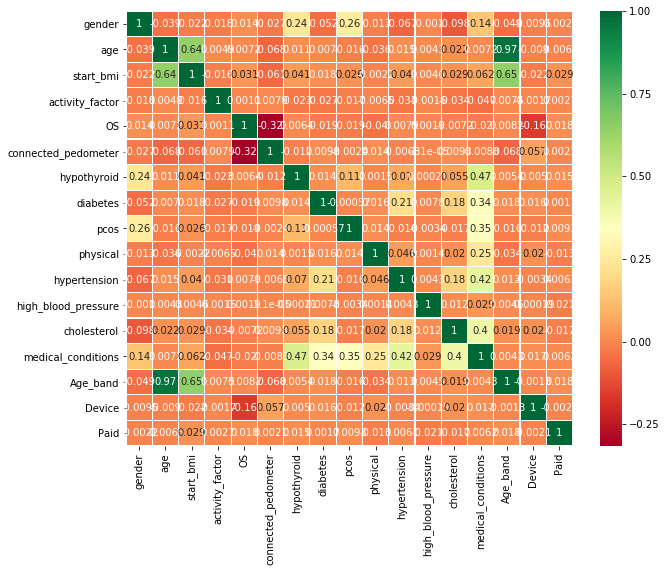

In [146]:
#Observing the correlation of the features using a heatmap
sns.heatmap(df_upsampled.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=pyplot.gcf()
fig.set_size_inches(10,8)
pyplot.show()

When two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

We shouldn't use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. So we can carry on with all features.

In [90]:
df_upsampled['Age_band']=0
df_upsampled.loc[df_upsampled['age']<=14,'Age_band']=0
df_upsampled.loc[(df_upsampled['age']>14)&(df_upsampled['age']<=32),'Age_band']=1
df_upsampled.loc[(df_upsampled['age']>32)&(df_upsampled['age']<=50),'Age_band']=2
df_upsampled.loc[(df_upsampled['age']>50)&(df_upsampled['age']<=68),'Age_band']=3
df_upsampled.loc[df_upsampled['age']>68,'Age_band']=4

Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [91]:
df_upsampled.head()

,user_id,gender,age,start_bmi,activity_factor,OS,connected_pedometer,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,devicebrand,paid,Age_band
0,2224406.0,male,44.0,32.7,1.725,ios,0,0,0,0,0,0,0,0,0,apple,0,2
1,2224394.0,female,63.0,33.7,1.200,android,0,0,0,0,0,0,0,0,0,motorola,0,3
2,2224399.0,male,84.0,31.4,1.550,android,0,0,0,0,0,1,0,0,1,samsung,0,4
3,2224448.0,male,84.0,34.9,1.200,android,google_fit,0,0,0,0,0,0,0,0,vivo,0,4
4,2224393.0,female,98.0,37.8,1.375,android,0,1,0,0,0,0,0,0,1,samsung,0,4


In [92]:
df_upsampled['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
4,118352
3,31394
2,28294
0,16523
1,5085


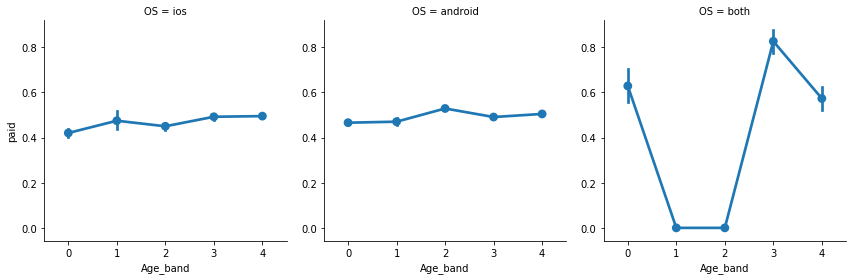

In [94]:
sns.factorplot('Age_band','paid',data=df_upsampled,col='OS')
pyplot.show()

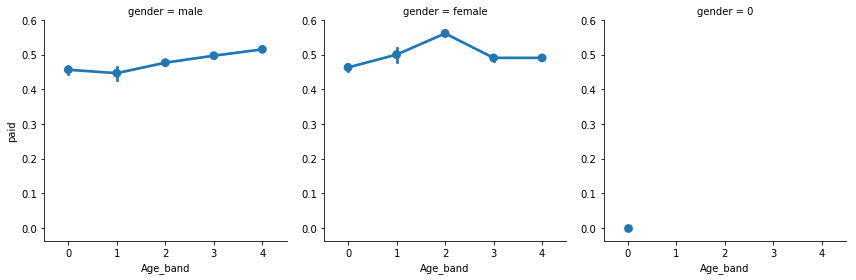

In [95]:
#Middle aged people are more inclined towards buying the paid plans
sns.factorplot('Age_band','paid',data=df_upsampled,col='gender')
pyplot.show()

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [96]:
df_upsampled['gender'].replace(['male','female'],[0,1],inplace=True)

In [99]:
df_upsampled['OS'].replace(['ios', 'android', 'both'],[0,1,2],inplace=True)

In [113]:
#df.groupby(['paid','devicebrand'])['paid'].count()

In [112]:
#df_upsampled['devicebrand'].unique()

In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [110]:
#Used LabelEncoder as the feature DeviceBrand had a lot of distinct variables
df_upsampled['Device']=le.fit_transform(df_upsampled['devicebrand'])

In [122]:
df_upsampled.head()

,gender,age,start_bmi,activity_factor,OS,connected_pedometer,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,Age_band,Device,Paid
0,0,44.0,32.7,1.725,0,0,0,0,0,0,0,0,0,0,2,133,0
1,1,63.0,33.7,1.200,1,0,0,0,0,0,0,0,0,0,3,151,0
2,0,84.0,31.4,1.550,1,0,0,0,0,0,1,0,0,1,4,153,0
3,0,84.0,34.9,1.200,1,1,0,0,0,0,0,0,0,0,4,155,0
4,1,98.0,37.8,1.375,1,0,1,0,0,0,0,0,0,1,4,153,0


In [114]:
df_upsampled.drop('user_id', axis=1, inplace=True)

In [116]:
df_upsampled['connected_pedometer'].replace([0, 'google_fit', 'Health App', 'fitbit', 'RIST'],[0,1,2,3,4],inplace=True)
#df_upsampled['connected_pedometer'].unique()

In [118]:
df_upsampled.drop('devicebrand', axis=1, inplace=True)

In [120]:
df_upsampled['Paid']=df_upsampled['paid']

In [121]:
df_upsampled.drop('paid', axis=1, inplace=True)

In [127]:
#Creating arrays of the data and splitting them for the training of the model
array = df_upsampled.values
X = array[:,0:16].astype(float)
Y = array[:,16]

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold
back from our analysis and modeling. We use it right at the end of our project to confirm the
accuracy of our final model. It is a smoke test that we can use to see if we messed up and to
give us confidence on our estimates of accuracy on unseen data. I used 80% of the dataset
for modeling and hold back 20% for validation.

In [129]:
#Using the Cross Validation Technique
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Let’s design
our test harness. I will use 10-fold cross validation. The dataset is not too small and this is
a good standard test harness configuration. I will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is. More
useful on binary classification problems like this one.

In [130]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In machine learning, there’s something called the “No Free Lunch” theorem. In a nutshell, it states that no one algorithm works best for every problem.There are many factors at play, such as the size and structure of your dataset.  Gut feel suggests distance based
algorithms and tree based algorithms would perform well. I created a baseline of performance on this problem and spot-check a number of different
algorithms. I will select a suite of different algorithms capable of working on this classification
problem.

In [134]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

SVM's are memory intensive, trickier to tune due to the importance of picking the right kernel, and don't scale well to larger datasets. Hence, I didn't include SVM algorithm in the list of models.

The algorithms all use default tuning parameters. Let’s compare the algorithms. I will
display the mean and standard deviation of accuracy for each algorithm as I calculate it and
collect the results for use later.

In [135]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.562185 (0.005450)
LDA: 0.561941 (0.005351)
KNN: 0.968588 (0.001574)
CART: 0.981943 (0.001105)
NB: 0.499318 (0.003690)


Running the example provides the output below. The results suggest That both CART and k-Nearest Neighbors may be worth further study.Nearest neighbors algorithms are "instance-based," which means that that save each training observation. They then make predictions for new observations by searching for the most similar training observations and pooling their values.CART are robust to outliers, scalable, and able to naturally model non-linear decision boundaries thanks to their hierarchical structure.

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))

In [ ]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Let’s evaluate the same algorithms with a standardized copy of the
dataset. This is where the data is transformed such that each attribute has a mean value of zero
and a standard deviation of one. We also need to avoid data leakage when we transform the
data. A good way to avoid leakage is to use pipelines that standardize the data and build the
model for each fold in the cross validation test harness. That way I can get a fair estimation
of how each model with standardized data might perform on unseen data.

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Another way that I can improve the performance of algorithms on this problem is by using
ensemble methods. I will use the same test harness as before, 10-fold cross validation. No data standardization
is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.Unconstrained, individual trees are prone to overfitting, but this can be alleviated by ensemble methods.

In [149]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.654679 (0.004882)
GBM: 0.720614 (0.003838)
RF: 0.986802 (0.001208)
ET: 0.986745 (0.001192)


We can see that both bagging techniques provide strong accuracy scores in the upper 90s (%)
with default configurations.

The Random Forest Classifier showed the most promise as a low biased and stable model for this problem with a flexible underlying structure. In
this section I will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that Random Forest performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. I could calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [154]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.987402955172
[[19410   464]
 [   39 20017]]
             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99     19874
        1.0       0.98      1.00      0.99     20056

avg / total       0.99      0.99      0.99     39930



The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics influences how the performance of machine learning algorithms is measured and compared.

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.
The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

In [155]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_validation, predictions))

0.987354179054


Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.
ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

In [163]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


We can further increase tune the hyperparamters of the model to make it more efficient. Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [164]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)
rf_random.best_params_
#Having some computational issues at the moment in my laptop,so not able to execute it at this time.

In [169]:
import pickle

In [170]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))